In [1]:
import tensorflow as tf
import numpy as np
import os
from skimage.io import imread, imshow
from skimage.transform import resize
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose
# tqdm - for showing progress
from tqdm import tqdm

In [2]:
TRAIN_PATH = "NuclieDataset/stage1_train"
TEST_PATH = "NuclieDataset/stage1_test"

In [4]:
TRAIN_IMAGES_FOLDERS = os.listdir(TRAIN_PATH)
n = len(TRAIN_IMAGES_FOLDERS)

IMG_WIDTH, IMG_HEIGHT, COLOR_CHANNEL = 128, 128, 3

X_train = np.zeros((n, IMG_HEIGHT, IMG_WIDTH, COLOR_CHANNEL), dtype=np.uint8)
Y_train = np.zeros((n, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

C:\Users\asus\AppData\Local\Temp\ipykernel_32920\3600249695.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((n, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)


In [5]:
n

670

In [6]:
X_train.shape

(670, 128, 128, 3)

In [7]:
img_path = TRAIN_PATH + "/" + TRAIN_IMAGES_FOLDERS[0] + "/images/"

In [8]:
img_path

'NuclieDataset/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/'

In [10]:
for i in tqdm(range(len(TRAIN_IMAGES_FOLDERS))):
    img_path = TRAIN_PATH + "/" + TRAIN_IMAGES_FOLDERS[i] + "/images/"
    img_name = os.listdir(img_path)[0]
    img_final_path = img_path + "/" + img_name
    img = imread(img_final_path)[:,:,:COLOR_CHANNEL]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode="constant",
                preserve_range=True)
    X_train[i] = img
    mask_path = TRAIN_PATH + "/" + TRAIN_IMAGES_FOLDERS[i] + "/masks/" 
    mask_images = os.listdir(mask_path)
    mask = np.zeros([IMG_HEIGHT, IMG_WIDTH, 1], dtype=np.bool)
    for j in range(len(mask_images)):
        mask_img = imread(mask_path + "/" + mask_images[j])
        mask_img = resize(mask_img, (IMG_HEIGHT, IMG_WIDTH), mode="constant",
                         preserve_range=True)
        mask_img = np.expand_dims(mask_img, axis=-1)
        mask = np.maximum(mask, mask_img)
    
    Y_train[i] = mask

  0%|                                                                                          | 0/670 [00:00<?, ?it/s]C:\Users\asus\AppData\Local\Temp\ipykernel_32920\1738662445.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros([IMG_HEIGHT, IMG_WIDTH, 1], dtype=np.bool)
100%|████████████████████████████████████████████████████████████████████████████████| 670/670 [06:34<00:00,  1.70it/s]


In [11]:
import matplotlib.pyplot as plt

In [12]:
X_train.shape

(670, 128, 128, 3)

In [13]:
Y_train.shape

(670, 128, 128, 1)

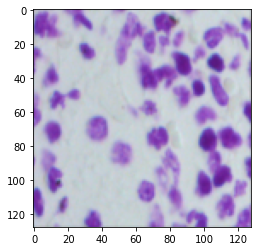

In [16]:
plt.imshow(X_train[3])
plt.show()

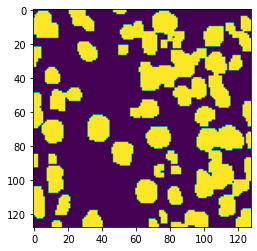

In [17]:
plt.imshow(Y_train[3])
plt.show()

In [18]:
# Testing Images and Mask Code

In [19]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, COLOR_CHANNEL))
x = tf.keras.layers.Lambda(lambda x : x / 255)(inputs)

# DownSampling
c1 = Conv2D(16, (3,3), activation="relu", padding="same")(x)
c1 = Dropout(0.2)(c1)
c1 = Conv2D(16, (3,3), activation="relu", padding="same")(c1)
p1 = MaxPooling2D((2,2))(c1)

c2 = Conv2D(32, (3,3), activation="relu", padding="same")(p1)
c2 = Dropout(0.2)(c2)
c2 = Conv2D(32, (3,3), activation="relu", padding="same")(c2)
p2 = MaxPooling2D((2,2))(c2)

c3 = Conv2D(64, (3,3), activation="relu", padding="same")(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3,3), activation="relu", padding="same")(c3)
p3 = MaxPooling2D((2,2))(c3)

c4 = Conv2D(128, (3,3), activation="relu", padding="same")(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3,3), activation="relu", padding="same")(c4)
p4 = MaxPooling2D((2,2))(c4)

c5 = Conv2D(256, (3,3), activation="relu", padding="same")(p4)
c5 = Dropout(0.2)(c5)
c5 = Conv2D(256, (3,3), activation="relu", padding="same")(c5)

# UpSampling
u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = Conv2D(128, (3,3), activation="relu", padding="same")(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3,3), activation="relu", padding="same")(c6)

u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = Conv2D(64, (3,3), activation="relu", padding="same")(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3,3), activation="relu", padding="same")(c7)

u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = Conv2D(32, (3,3), activation="relu", padding="same")(u8)
c8 = Dropout(0.2)(c8)
c8 = Conv2D(32, (3,3), activation="relu", padding="same")(c8)

u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = Conv2D(16, (3,3), activation="relu", padding="same")(u9)
c9 = Dropout(0.2)(c9)
c9 = Conv2D(16, (3,3), activation="relu", padding="same")(c9)

outputs = Conv2D(1, (1,1), activation="sigmoid")(c9)

In [20]:
model = tf.keras.Model(inputs=[inputs], outputs=outputs)

In [22]:
# model.summary()

In [23]:
model.compile(optimizer="adam", loss="binary_crossentropy", 
             metrics=["accuracy"])

results = model.fit(X_train, Y_train, batch_size=16, epochs=20)

Epoch 1/20
42/42 [==============================] - 42s 939ms/step - loss: 0.6123 - accuracy: 0.7454
Epoch 2/20
42/42 [==============================] - 37s 870ms/step - loss: 0.4400 - accuracy: 0.7547
Epoch 3/20
42/42 [==============================] - 38s 911ms/step - loss: 0.3132 - accuracy: 0.8716
Epoch 4/20
42/42 [==============================] - 37s 887ms/step - loss: 0.2696 - accuracy: 0.8952
Epoch 5/20
42/42 [==============================] - 36s 854ms/step - loss: 0.2233 - accuracy: 0.9132
Epoch 6/20
42/42 [==============================] - 36s 856ms/step - loss: 0.1848 - accuracy: 0.9289
Epoch 7/20
42/42 [==============================] - 36s 869ms/step - loss: 0.1607 - accuracy: 0.9370
Epoch 8/20
42/42 [==============================] - 36s 850ms/step - loss: 0.1505 - accuracy: 0.9422
Epoch 9/20
42/42 [==============================] - 38s 898ms/step - loss: 0.1333 - accuracy: 0.9479
Epoch 10/20
42/42 [==============================] - 38s 893ms/step - loss: 0.1275 - accura

In [33]:
TEST_IMAGES_FOLDERS = os.listdir(TEST_PATH)
test_n = len(TEST_IMAGES_FOLDERS)

In [36]:
X_test = np.zeros((test_n, IMG_HEIGHT, IMG_WIDTH, COLOR_CHANNEL), dtype=np.uint8)

In [37]:
X_test.shape

(65, 128, 128, 3)

In [38]:
for i in tqdm(range(len(TEST_IMAGES_FOLDERS))):
    img_path = TEST_PATH + "/" + TEST_IMAGES_FOLDERS[i] + "/images/"
    img_name = os.listdir(img_path)[0]
    img_final_path = img_path + "/" + img_name
    img = imread(img_final_path)[:,:,:COLOR_CHANNEL]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode="constant",
                preserve_range=True)
    X_test[i] = img

100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [00:02<00:00, 29.83it/s]


In [39]:
test_predictions = model.predict(X_test)

3/3 [==============================] - 1s 153ms/step


In [40]:
test_predictions.shape

(65, 128, 128, 1)

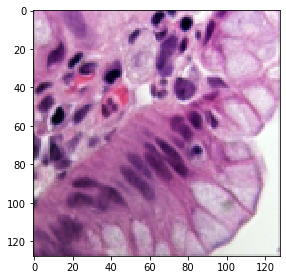

In [50]:
imshow(X_test[5])
plt.show()

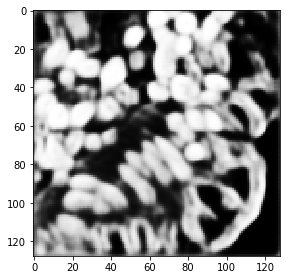

In [51]:
imshow(test_predictions[5])
plt.show()

In [49]:
TEST_IMAGES_FOLDERS.index("0f1f896d9ae5a04752d3239c690402c022db4d72c0d2c087d73380896f72c466")

5